In [2]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import numpy as np

In [3]:
def load_data(data_dir):
    data = []
    labels = os.listdir(data_dir)
    for label in labels:
        class_dir = os.path.join(data_dir, label)
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            data.append((file_path, label))
    return pd.DataFrame(data, columns=['file_path', 'label'])

# Display sample images
def display_sample_images(data, num_samples=5):
    fig, axes = plt.subplots(len(data['label'].unique()), num_samples, figsize=(15, 10))
    for i, label in enumerate(data['label'].unique()):
        sample_images = data[data['label'] == label].sample(num_samples)['file_path']
        for j, file_path in enumerate(sample_images):
            image = Image.open(file_path)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(label)
    plt.show()

def get_image_size(file_path):
    image = cv2.imread(file_path)
    return image.shape[:2]  # height, width

In [7]:
# Define the paths
train_dir = '../data/train'
test_dir = '../data/test'

In [8]:
train_data = load_data(train_dir)
test_data = load_data(test_dir)

In [9]:
# Combine train and test data for overall analysis
data = pd.concat([train_data, test_data], ignore_index=True)

In [11]:
# Data Summary
print(f'Total images: {len(data)}')
print(f'Total training images: {len(train_data)}')
print(f'Total testing images: {len(test_data)}')
print(f'Number of classes: {data["label"].nunique()}')

Total images: 42953
Total training images: 35887
Total testing images: 7066
Number of classes: 7


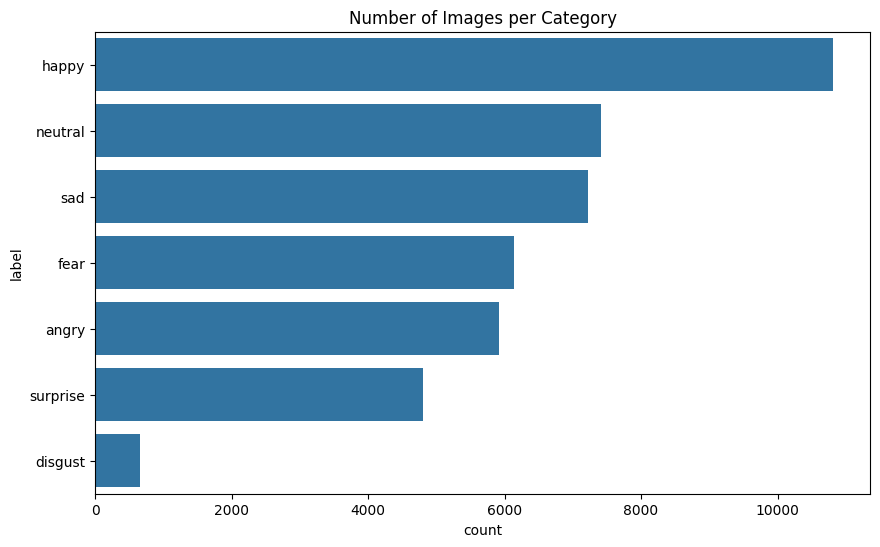

In [12]:
# Count of images per category
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=data, order=data['label'].value_counts().index)
plt.title('Number of Images per Category')
plt.show()

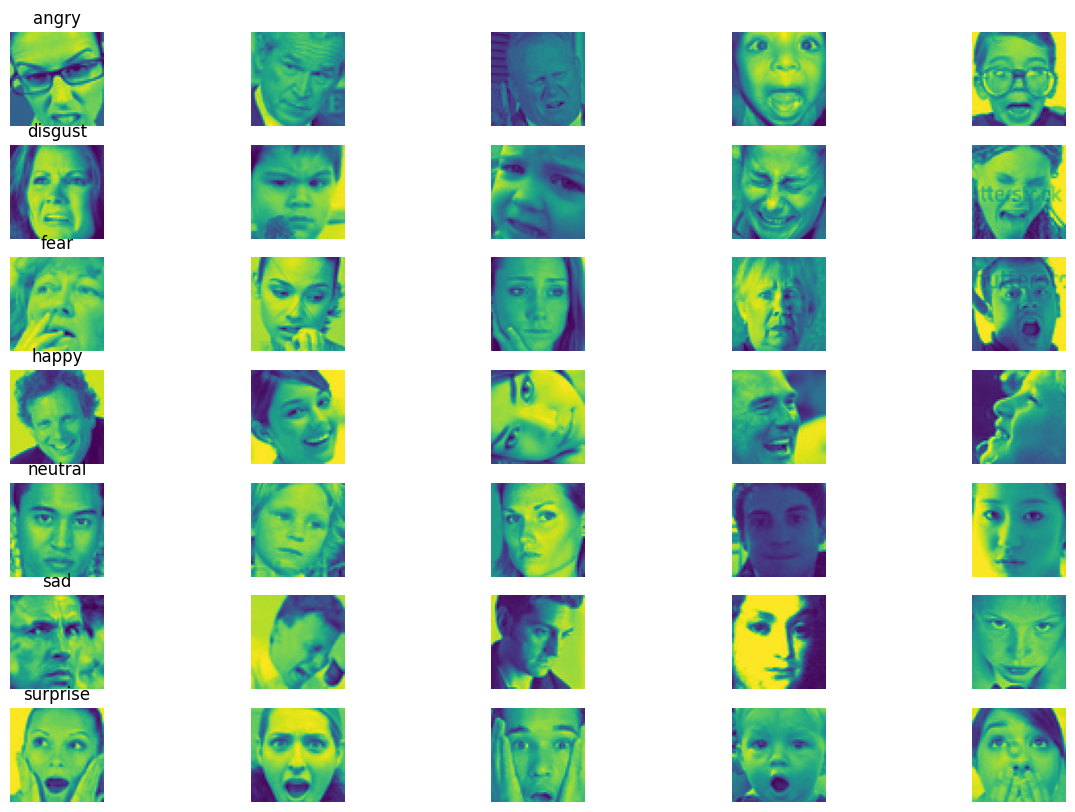

In [13]:
display_sample_images(train_data)

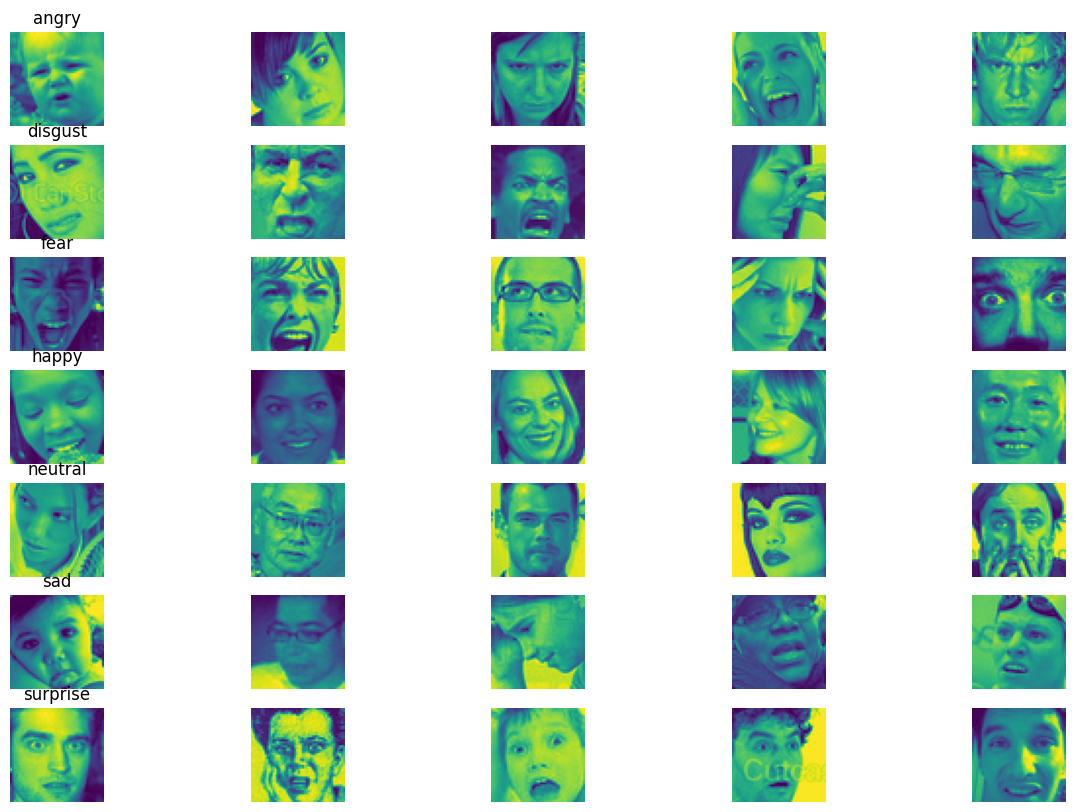

In [13]:
display_sample_images(test_data)

In [14]:
data['image_size'] = data['file_path'].apply(get_image_size)
data['height'] = data['image_size'].apply(lambda x: x[0])
data['width'] = data['image_size'].apply(lambda x: x[1])

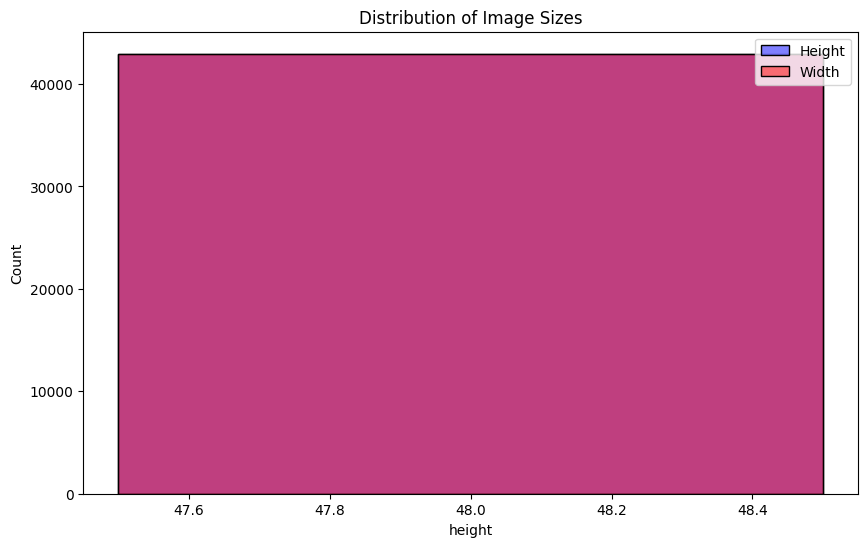

In [15]:
# Plot the distribution of image sizes
plt.figure(figsize=(10, 6))
sns.histplot(data['height'], kde=True, color='blue', label='Height')
sns.histplot(data['width'], kde=True, color='red', label='Width')
plt.legend()
plt.title('Distribution of Image Sizes')
plt.show()

In [16]:
# Average image size per category
avg_size_per_category = data.groupby('label')[['height', 'width']].mean().reset_index()
print(avg_size_per_category)

      label  height  width
0     angry    48.0   48.0
1   disgust    48.0   48.0
2      fear    48.0   48.0
3     happy    48.0   48.0
4   neutral    48.0   48.0
5       sad    48.0   48.0
6  surprise    48.0   48.0


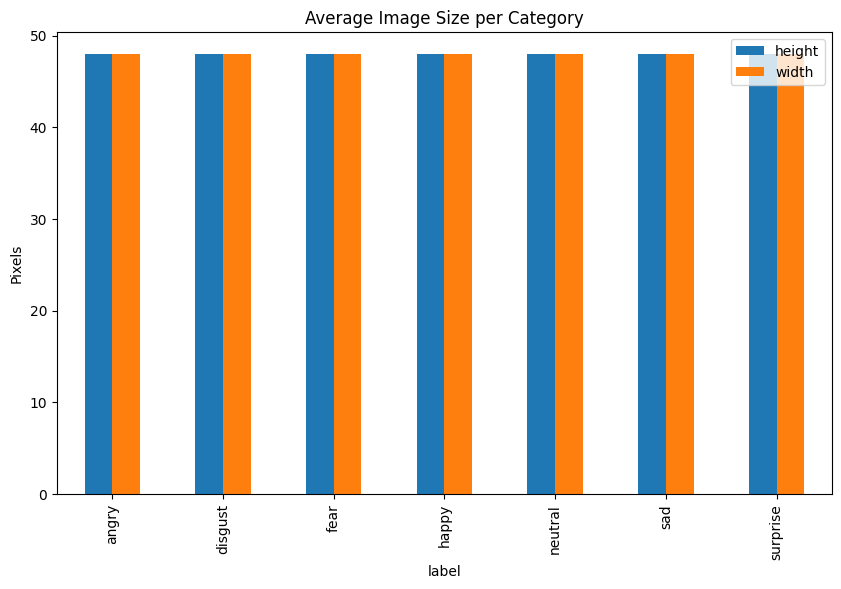

In [17]:
# Plot average image size per category
avg_size_per_category.plot(kind='bar', x='label', y=['height', 'width'], figsize=(10, 6))
plt.title('Average Image Size per Category')
plt.ylabel('Pixels')
plt.show()

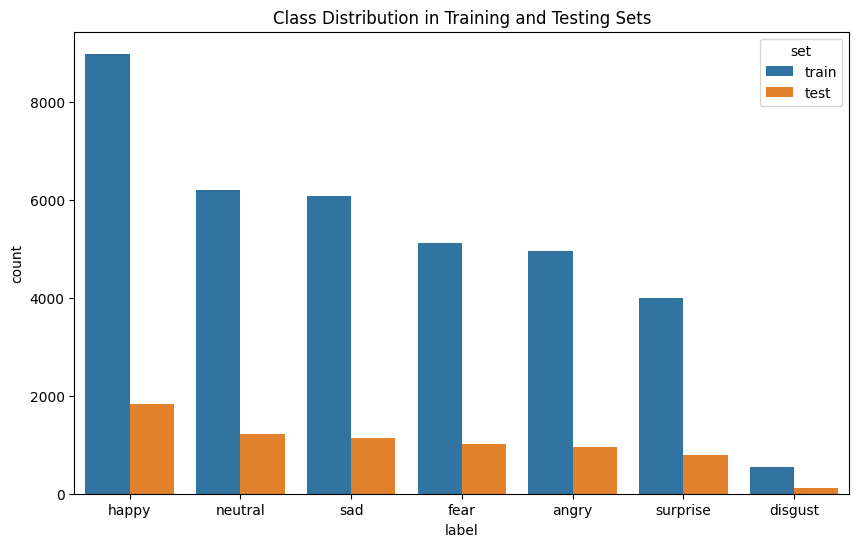

In [18]:
# Class Distribution in Training and Testing Sets
plt.figure(figsize=(10, 6))
train_counts = train_data['label'].value_counts().reset_index()
train_counts.columns = ['label', 'count']
train_counts['set'] = 'train'
test_counts = test_data['label'].value_counts().reset_index()
test_counts.columns = ['label', 'count']
test_counts['set'] = 'test'
class_distribution = pd.concat([train_counts, test_counts])
sns.barplot(x='label', y='count', hue='set', data=class_distribution)
plt.title('Class Distribution in Training and Testing Sets')
plt.show()

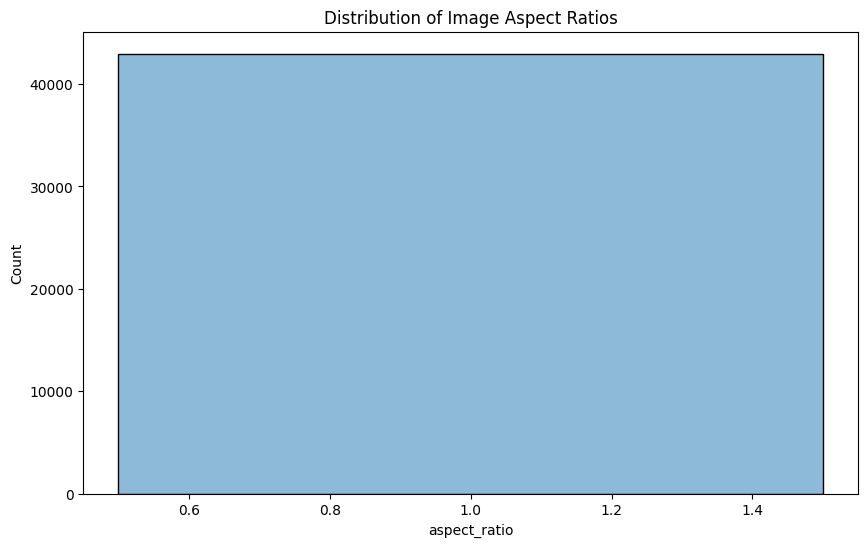

In [19]:
# Image Aspect Ratio Analysis
data['aspect_ratio'] = data['height'] / data['width']
plt.figure(figsize=(10, 6))
sns.histplot(data['aspect_ratio'], kde=True)
plt.title('Distribution of Image Aspect Ratios')
plt.show()

In [20]:
def plot_pixel_intensity(file_path):
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(6, 4))
    sns.histplot(image.ravel(), bins=256, kde=True)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

Pixel Intensity Distribution for angry image


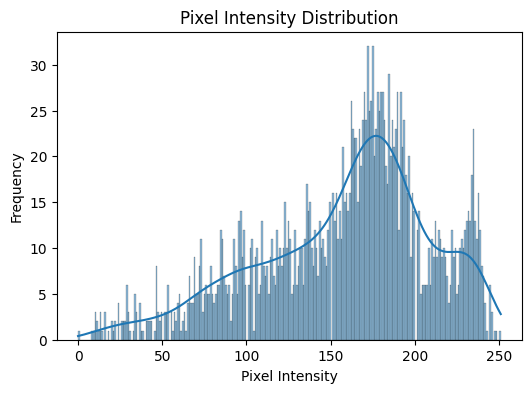

Pixel Intensity Distribution for disgust image


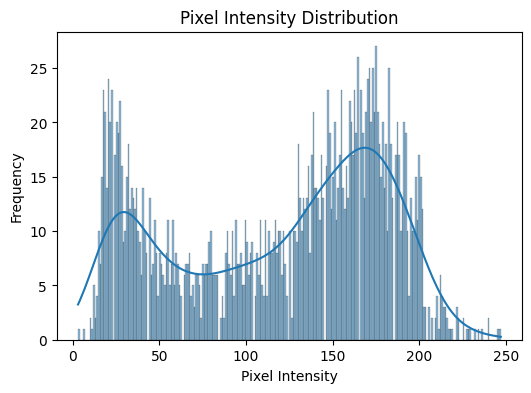

Pixel Intensity Distribution for fear image


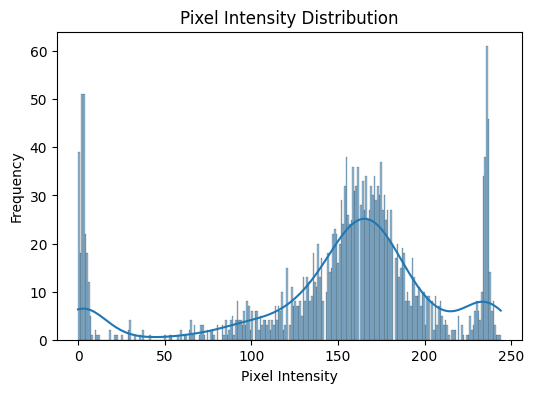

Pixel Intensity Distribution for happy image


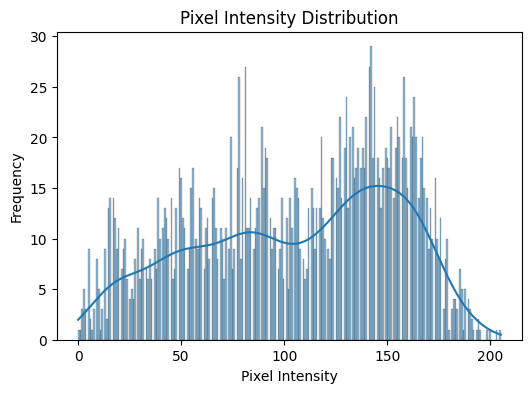

Pixel Intensity Distribution for neutral image


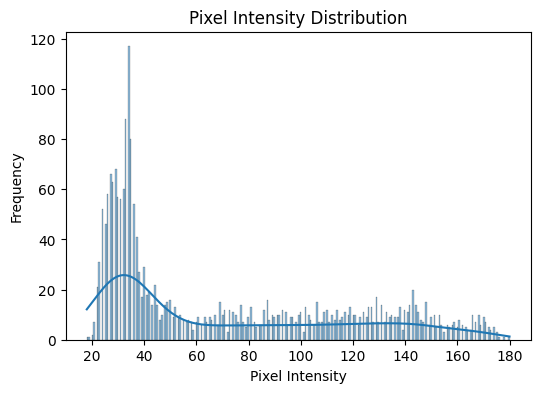

Pixel Intensity Distribution for sad image


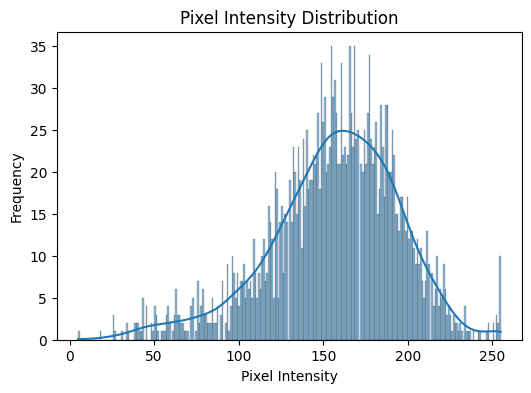

Pixel Intensity Distribution for surprise image


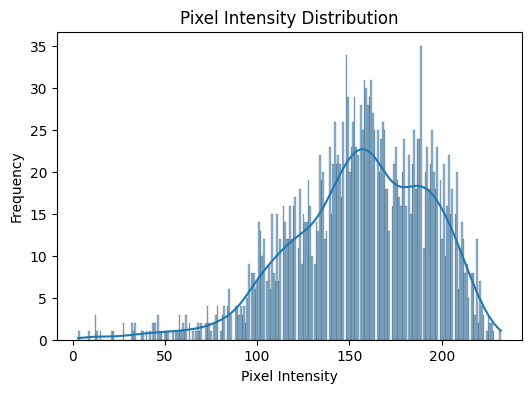

In [21]:
# Display pixel intensity distribution for a sample image from each category
for label in data['label'].unique():
    sample_image = data[data['label'] == label].sample(1)['file_path'].values[0]
    print(f'Pixel Intensity Distribution for {label} image')
    plot_pixel_intensity(sample_image)

In [22]:
def plot_color_channel_distribution(file_path):
    image = cv2.imread(file_path)
    color = ('b', 'g', 'r')
    plt.figure(figsize=(6, 4))
    for i, col in enumerate(color):
        sns.histplot(image[..., i].ravel(), bins=256, kde=True, color=col, label=col)
    plt.title('Color Channel Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Color Channel Distribution for angry image


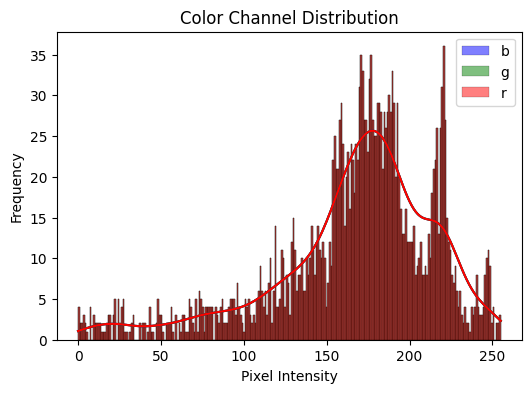

Color Channel Distribution for disgust image


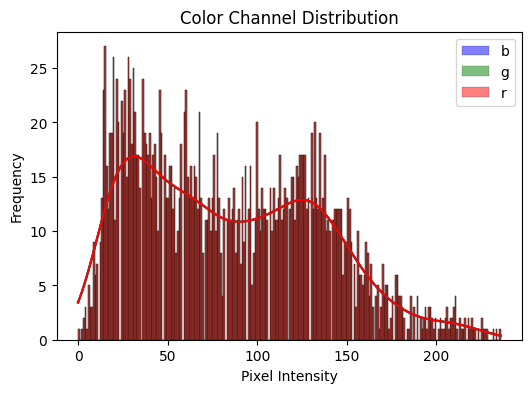

Color Channel Distribution for fear image


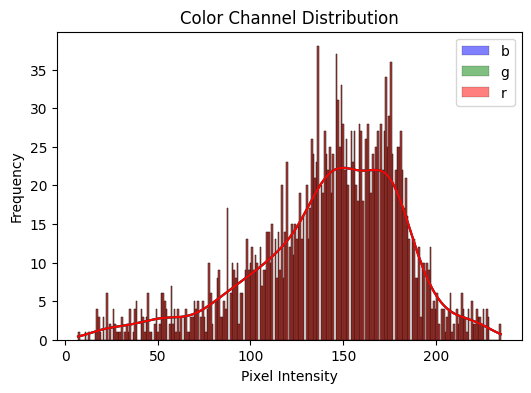

Color Channel Distribution for happy image


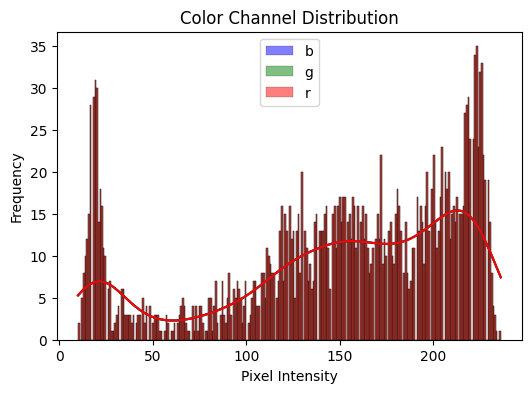

Color Channel Distribution for neutral image


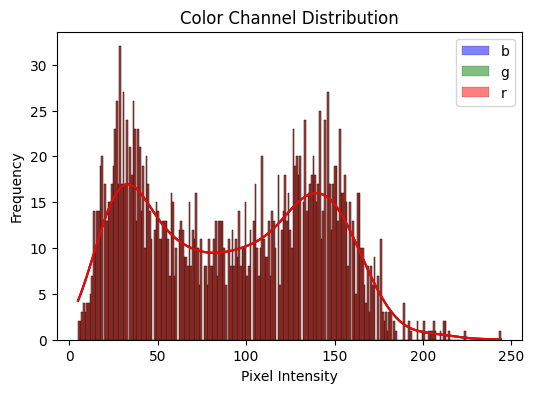

Color Channel Distribution for sad image


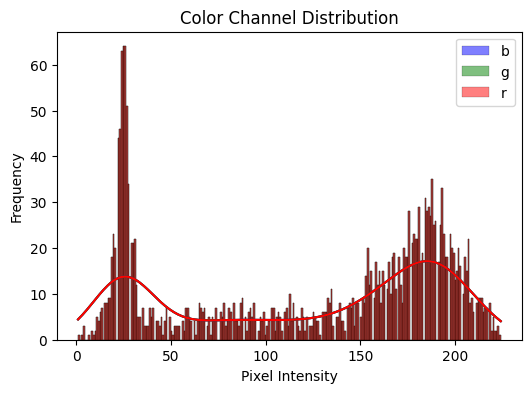

Color Channel Distribution for surprise image


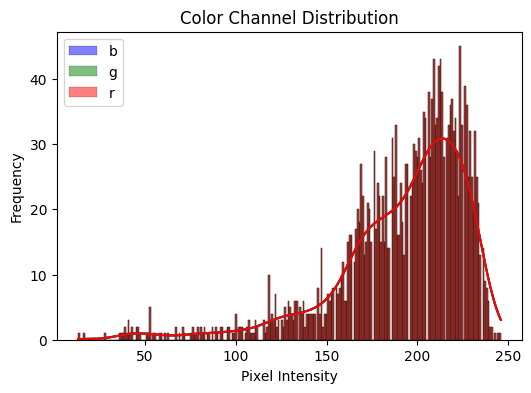

In [23]:
for label in data['label'].unique():
    sample_image = data[data['label'] == label].sample(1)['file_path'].values[0]
    print(f'Color Channel Distribution for {label} image')
    plot_color_channel_distribution(sample_image)

In [25]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
df = data.apply(pd.to_numeric, errors='coerce')
sns.heatmap(df[['height', 'width', 'aspect_ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'astpye'

<Figure size 1000x600 with 0 Axes>